Hmm, puzzling. It appears that Random Forest does not suffer from overfitting.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', np.RankWarning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [52]:
nTemplate = 4
nFeature = 100

templates = [np.random.uniform(0, 1, nFeature) for iTemp in range(nTemplate)]

In [71]:
def genData(templates, n, noise):
    data = []
    labels = []
    for iTemp, temp in enumerate(templates):
        data += [temp + np.random.normal(0, 1, temp.shape[0]) for i in range(n)]
        labels += [iTemp]*n
    
    return np.array(data), np.array(labels)

nDataTrain = 400
nDataTest = 100
noise = 2

data_train, labels_train = genData(templates, nDataTrain // nTemplate, noise)
data_test, labels_test = genData(templates, nDataTest // nTemplate, noise)

Fitness for regular


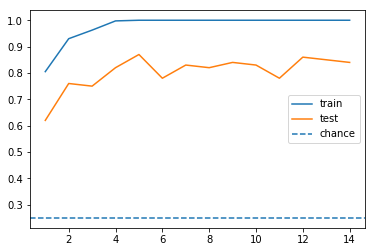

Fitness for shuffle


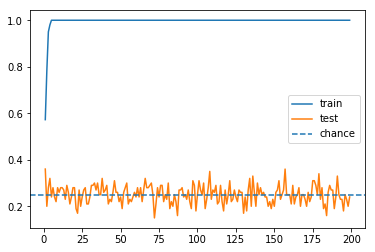

In [79]:
def study_accuracy(x_train, y_train, x_test, y_test, nTemplate, nDepthRange):
    acc_train = []
    acc_test = []
    for nDep in nDepthRange:

        clf = RandomForestClassifier(n_estimators=100, max_depth=nDep)
        clf.fit(x_train, y_train)

        predict_train = clf.predict(x_train)
        predict_test = clf.predict(x_test)

        acc_train += [np.mean(predict_train == y_train)]
        acc_test += [np.mean(predict_test == y_test)]

    plt.figure()
    plt.plot(list(nDepthRange), acc_train, label='train')
    plt.plot(list(nDepthRange), acc_test, label='test')
    plt.axhline(y = 1/nTemplate, linestyle='--', label='chance')
    plt.legend()
    plt.show()
    

nDepRange = np.arange(1, 15)
    
print("Fitness for regular")
study_accuracy(data_train, labels_train, data_test, labels_test, nTemplate, nDepRange)

print("Fitness for shuffle")
labels_train_sh = labels_train[np.random.permutation(nDataTrain)]
labels_test_sh = labels_test[np.random.permutation(nDataTest)]

study_accuracy(data_train, labels_train_sh, data_test, labels_test_sh, nTemplate, nEstRange)